## 1. Getting Started

### Installing Pandas

In [ ]:
### Pip install pandas
### Conda install pandas

### Loading Pandas

In [1]:
import pandas as pd
import numpy as np

### Hello World of Pandas

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])

In [5]:
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
type(list(data.values))

list

### Series With Index

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data["a":"b"]

a    0.25
b    0.50
dtype: float64

### Creating Series from dictionary

In [11]:
population_dict = {'California': 38332521,
 'Texas': 26448193,
 'New York': 19651127,
 'Florida': 19552860,
 'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [12]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [25]:
population["California":"Florida"]

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

### Creating Dataframe from  Two Series

In [13]:
states = pd.DataFrame({'population': population,
 'area': area})
states


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


### Creating Dataframe From Simple Dictionary

In [24]:
pd.DataFrame([{'a': 1, 'b': 2,'c':3}, {'a':5,'b': 3, 'c': 4}])

,a,b,c
0,1,2,3
1,5,3,4


In [14]:
pd.DataFrame({'a':[1,5],'b':[2,3],'c':[3,4]})

,a,b,c
0,1,2,3
1,5,3,4


### Dataframe Dimensions

In [17]:
len(states)

5

In [18]:
states.shape

(5, 2)

In [20]:
list(states.columns)

['population', 'area']

### Accessing Rows and Columns

In [23]:
states["population"]

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [24]:
states.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [26]:
states["California":"Florida"]

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312


In [31]:
states.loc["California":"Florida"]

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312


In [32]:
states[0:3]

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


### Creating New Columns In Dataframe

In [33]:
states['density'] = states['population'] / states['area']


In [34]:
states.head()

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


### Filtering Rows In Dataframe

In [35]:
states.density > 100

California    False
Texas         False
New York       True
Florida        True
Illinois      False
Name: density, dtype: bool

In [36]:
states[states.density > 100]

,population,area,density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


In [56]:
states.density > 100

California    False
Texas         False
New York       True
Florida        True
Illinois      False
Name: density, dtype: bool

In [60]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [61]:
pd.Series([False,False,True,True,False],['California', 'Texas', 'New York', 'Florida', 'Illinois'])

California    False
Texas         False
New York       True
Florida        True
Illinois      False
dtype: bool

In [62]:
states[pd.Series([False,False,True,True,False],['California', 'Texas', 'New York', 'Florida', 'Illinois'])]

,population,area,density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


In [44]:
states[(states.density > 100) & (states.area > 150000)]

,population,area,density
Florida,19552860,170312,114.806121


In [42]:
states[["population","area"]]

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


## 2. Handling Missing Values

##### isnull() - Generate a Boolean mask indicating missing values
##### notnull() - Opposite of isnull()
##### dropna()  - Return a filtered version of the data
##### fillna() - Return a copy of the data with missing values filled or imputed

In [45]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [46]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

### Filtering Missing Values

In [47]:
data.notnull()

0        1
2    hello
dtype: object

In [53]:
data[pd.Series([True,True,False,True])]

0       1
1     NaN
3    None
dtype: object

In [48]:
data[data.isnull()]

1     NaN
3    None
dtype: object

### Dropping Missing Values

In [64]:
data.dropna()

0        1
2    hello
dtype: object

In [49]:
df = pd.DataFrame([[1, np.nan, 2],[2, 3, 5],[np.nan, 4, 6]],columns=["One","Second","Third"])
df

,One,Second,Third
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [66]:
 df.dropna()

,0,1,2
1,2.0,3.0,5


In [67]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


### Filling Null Values

In [69]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [70]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [71]:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [72]:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [73]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [74]:
df.fillna(method='ffill')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


In [75]:
df.fillna(method='ffill', axis=1)

,0,1,2
0,1.0,1.0,2.0
1,2.0,3.0,5.0
2,NaN,4.0,6.0


## 3.  Joins In Pandas

In [50]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})


In [51]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [52]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


### One-To-One-Joins

In [53]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Many-To-One_Joins

In [54]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


### Many-To-Many-Joins

In [84]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting','Engineering', 'Engineering', 'HR', 'HR'],
     'skills': ['math', 'spreadsheets', 'coding', 'linux','spreadsheets', 'organization']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [85]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


### Merge On Specified Columns

In [86]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [55]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

pd.merge(df1, df3, left_on="employee", right_on="name")


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [56]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop(['name'], axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### Inner Join

In [57]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

In [58]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [59]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [60]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


### Left Join

In [62]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


### Right Join

In [96]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


### Outer Join

In [63]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


### Reading In  Data Files

In [64]:
import os
os.getcwd()

'D:\\contents\\blogs\\Data_Science_Using_Python\\code'

In [67]:
pop = pd.read_csv('..\data\\state-population.csv')
areas = pd.read_csv('..\data\\state-areas.csv')
abbrevs = pd.read_csv('..\data\\state-abbrevs.csv')


In [68]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [69]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [70]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [71]:
merged = pd.merge(pop, abbrevs, how='outer',left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


### Checking For Missing Values

In [103]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [72]:
merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state           96
dtype: int64

In [104]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [106]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

### Filling Missing Values

In [73]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [75]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [76]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [78]:
## We see that our areas DataFrame does not contain the area of the United States as a whole
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [79]:
final['state'][final['population'].isnull()].unique()

array(['Puerto Rico'], dtype=object)

In [80]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [81]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

## 4.  Aggregation And Grouping

### Loading In Planet Data

In [82]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [117]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [83]:
planets.mass.mean()

2.6381605847953216

In [84]:
planets.groupby('method')['orbital_period'].median()


method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [89]:
planets.groupby(['method','year'])['orbital_period',"mass"].median()

orbital_period  mass
method                    year                      
Astrometry                2010     1016.000000   NaN
                          2013      246.360000   NaN
Eclipse Timing Variations 2008     4544.000000   NaN
                          2009    10220.000000  6.05
                          2010     4228.525000   NaN
...                                        ...   ...
Transit                   2014        8.385385   NaN
Transit Timing Variations 2011      160.000000   NaN
                          2012       57.011000   NaN
                          2013       22.339500   NaN
                          2014             NaN   NaN

[69 rows x 2 columns]

In [90]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [126]:
pd.DataFrame(planets.groupby('method')['distance'].describe())


,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,17.875000,4.094148,14.98,16.4275,17.875,19.3225,20.77
Eclipse Timing Variations,4.0,315.360000,213.203907,130.72,130.7200,315.360,500.0000,500.00
Imaging,32.0,67.715937,53.736817,7.69,22.1450,40.395,132.6975,165.00
Microlensing,10.0,4144.000000,2076.611556,1760.00,2627.5000,3840.000,4747.5000,7720.00
Orbital Brightness Modulation,2.0,1180.000000,0.000000,1180.00,1180.0000,1180.000,1180.0000,1180.00
Pulsar Timing,1.0,1200.000000,NaN,1200.00,1200.0000,1200.000,1200.0000,1200.00
Pulsation Timing Variations,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Radial Velocity,530.0,51.600208,45.559381,1.35,24.4125,40.445,59.2175,354.00
Transit,224.0,599.298080,913.876990,38.00,200.0000,341.000,650.0000,8500.00


## Pivot Tables

In [92]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [93]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [94]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

### Equivalent In Pivot Table

In [132]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [143]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [95]:
titanic.pivot_table('survived', index='sex', columns='class',aggfunc="sum")

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


### Pivot On Multiple Columns

In [137]:
titanic.pivot_table('survived', index=['sex',"embarked"], columns=['class'])

class               First    Second     Third
sex    embarked                              
female C         0.976744  1.000000  0.652174
       Q         1.000000  1.000000  0.727273
       S         0.958333  0.910448  0.375000
male   C         0.404762  0.200000  0.232558
       Q         0.000000  0.000000  0.076923
       S         0.354430  0.154639  0.128302

### Compute Multiple Columns

In [140]:
titanic.pivot_table(index='sex', columns='class',aggfunc={'survived':sum, 'fare':'mean'})


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

### Combining Both Multiple Columns & Measures

In [147]:
titanic.pivot_table(index=['sex',"embarked"], 
                    columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class                 First     Second      Third    First Second Third
sex    embarked                                                        
female C         115.640309  25.268457  14.694926       42      7    15
       Q          90.000000  12.350000  10.307833        1      2    24
       S          99.026910  21.912687  18.670077       46     61    33
male   C          93.536707  25.421250   9.352237       17      2    10
       Q          90.000000  12.350000  11.924251        0      0     3
       S          52.949947  19.232474  13.307149       28     15    34

## Case Study To Understand Pandas

### Read In Weather Data

In [4]:
data = pd.read_csv("..\\data\\weather_year.csv")

In [5]:
data.head()

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202


### Getting Shape of the data

In [6]:
len(data)

366

In [7]:
data.shape

(366, 23)

### Knowing Columns Names

In [8]:
data.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

### Get The Feel Of The Data

In [9]:
data.head()

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202


### Summary Stats

In [10]:
data.describe()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,CloudCover,WindDirDegrees
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,366.000000,366.000000
mean,66.803279,55.683060,44.101093,49.549180,44.057377,37.980874,90.027322,67.860656,45.193989,30.108907,30.022705,29.936831,9.994536,8.732240,5.797814,16.418033,6.057377,22.764384,2.885246,189.704918
std,20.361247,18.436506,17.301141,16.397178,16.829996,17.479449,9.108438,9.945591,15.360261,0.172189,0.174112,0.182476,0.073821,1.875406,3.792219,5.564329,3.200940,8.131092,2.707261,94.045080
min,16.000000,11.000000,1.000000,0.000000,-3.000000,-5.000000,54.000000,37.000000,15.000000,29.640000,29.420000,29.230000,9.000000,2.000000,0.000000,6.000000,0.000000,7.000000,0.000000,1.000000
25%,51.000000,41.000000,30.000000,36.000000,30.000000,24.000000,85.000000,61.250000,35.000000,29.990000,29.910000,29.830000,10.000000,8.000000,2.000000,13.000000,4.000000,17.000000,0.000000,131.000000
50%,69.000000,59.000000,47.000000,54.500000,48.000000,41.000000,93.000000,68.000000,42.000000,30.100000,30.020000,29.940000,10.000000,10.000000,6.000000,16.000000,6.000000,22.000000,2.000000,192.500000
75%,84.000000,70.750000,57.750000,62.000000,57.000000,51.000000,96.000000,74.000000,54.000000,30.210000,30.127500,30.040000,10.000000,10.000000,10.000000,20.000000,8.000000,26.000000,5.000000,259.750000
max,106.000000,89.000000,77.000000,77.000000,72.000000,71.000000,100.000000,95.000000,90.000000,30.600000,30.480000,30.440000,10.000000,10.000000,10.000000,39.000000,19.000000,63.000000,8.000000,360.000000


### More Info On Categorical Columns

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
EDT                           366 non-null object
Max TemperatureF              366 non-null int64
Mean TemperatureF             366 non-null int64
Min TemperatureF              366 non-null int64
Max Dew PointF                366 non-null int64
MeanDew PointF                366 non-null int64
Min DewpointF                 366 non-null int64
Max Humidity                  366 non-null int64
 Mean Humidity                366 non-null int64
 Min Humidity                 366 non-null int64
 Max Sea Level PressureIn     366 non-null float64
 Mean Sea Level PressureIn    366 non-null float64
 Min Sea Level PressureIn     366 non-null float64
 Max VisibilityMiles          366 non-null int64
 Mean VisibilityMiles         366 non-null int64
 Min VisibilityMiles          366 non-null int64
 Max Wind SpeedMPH            366 non-null int64
 Mean Wind SpeedMPH           366 non-null int64
 Max G

### Fun With Brackets

In [12]:
print (type(data["Max TemperatureF"]))
print (type(data[["Max TemperatureF"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
data[["Max TemperatureF]]

,Max TemperatureF
0,56
1,67
2,71
3,76
4,80


### Not Only Brackets

In [14]:
data.Max

0    2012-3-10
1    2012-3-11
2    2012-3-12
3    2012-3-13
4    2012-3-14
Name: EDT, dtype: object

In [ ]:
data.Ma

### Renaming Column Names

In [21]:
data.columns = ["time", "max_temp", "mean_temp", "min_temp", "max_dew",
                "mean_dew", "min_dew", "max_humidity", "mean_humidity",
                "min_humidity", "max_pressure", "mean_pressure",
                "min_pressure", "max_visibilty", "mean_visibility",
                "min_visibility", "max_wind", "mean_wind", "min_wind",
                "precipitation", "cloud_cover", "events", "wind_dir"]

In [22]:
data.max_dew.head()

0    24
1    43
2    59
3    57
4    58
Name: max_dew, dtype: int64

### Renaming Single Columns

In [23]:
data = data.rename(columns={"time":"date"})
data.head(2)

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163


### Always Hit Tab For More Magic

In [24]:
data.max_temp.mean()

66.80327868852459

### Modfying Date Format

In [25]:
first_date = data.date.values[0]
print(first_date,type(first_date))
from datetime import datetime
datetime.strptime(first_date, "%Y-%m-%d")

2012-3-10 <class 'str'>


datetime.datetime(2012, 3, 10, 0, 0)

### Lets Change Complete Columns

In [26]:
data.date = data.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
data.head()

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
0,2012-03-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-03-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-03-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-03-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-03-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202


### Understanding & Modifying Index

In [170]:
data.index

RangeIndex(start=0, stop=366, step=1)

In [172]:
data.loc[0]

date               2012-03-10 00:00:00
max_temp                            56
mean_temp                           40
min_temp                            24
max_dew                             24
mean_dew                            20
min_dew                             16
max_humidity                        74
mean_humidity                       50
min_humidity                        26
max_pressure                     30.53
mean_pressure                    30.45
min_pressure                     30.34
max_visibilty                       10
mean_visibility                     10
min_visibility                      10
max_wind                            13
mean_wind                            6
min_wind                            17
precipitation                     0.00
cloud_cover                          0
events                             NaN
wind_dir                           138
Name: 0, dtype: object

In [27]:
data.index = data.date

In [28]:
data.index

DatetimeIndex(['2012-03-10', '2012-03-11', '2012-03-12', '2012-03-13',
               '2012-03-14', '2012-03-15', '2012-03-16', '2012-03-17',
               '2012-03-18', '2012-03-19',
               ...
               '2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-09', '2013-03-10'],
              dtype='datetime64[ns]', name='date', length=366, freq=None)

### Search By Date

In [175]:
data.loc[datetime(2012, 8, 26)]

date               2012-08-26 00:00:00
max_temp                            89
mean_temp                           76
min_temp                            62
max_dew                             66
mean_dew                            63
min_dew                             61
max_humidity                        87
mean_humidity                       66
min_humidity                        45
max_pressure                     30.12
mean_pressure                    30.05
min_pressure                     29.98
max_visibilty                       10
mean_visibility                     10
min_visibility                       7
max_wind                            16
mean_wind                            5
min_wind                            21
precipitation                     0.00
cloud_cover                          1
events                             NaN
wind_dir                           197
Name: 2012-08-26 00:00:00, dtype: object

### Dropping Date Column

In [29]:
data = data.drop(["date"],axis=1)
data.columns

Index(['max_temp', 'mean_temp', 'min_temp', 'max_dew', 'mean_dew', 'min_dew',
       'max_humidity', 'mean_humidity', 'min_humidity', 'max_pressure',
       'mean_pressure', 'min_pressure', 'max_visibilty', 'mean_visibility',
       'min_visibility', 'max_wind', 'mean_wind', 'min_wind', 'precipitation',
       'cloud_cover', 'events', 'wind_dir'],
      dtype='object')

### Visualizing Missing Values

In [180]:
data.isnull().sum()

max_temp             0
mean_temp            0
min_temp             0
max_dew              0
mean_dew             0
min_dew              0
max_humidity         0
mean_humidity        0
min_humidity         0
max_pressure         0
mean_pressure        0
min_pressure         0
max_visibilty        0
mean_visibility      0
min_visibility       0
max_wind             0
mean_wind            0
min_wind             1
precipitation        0
cloud_cover          0
events             204
wind_dir             0
dtype: int64

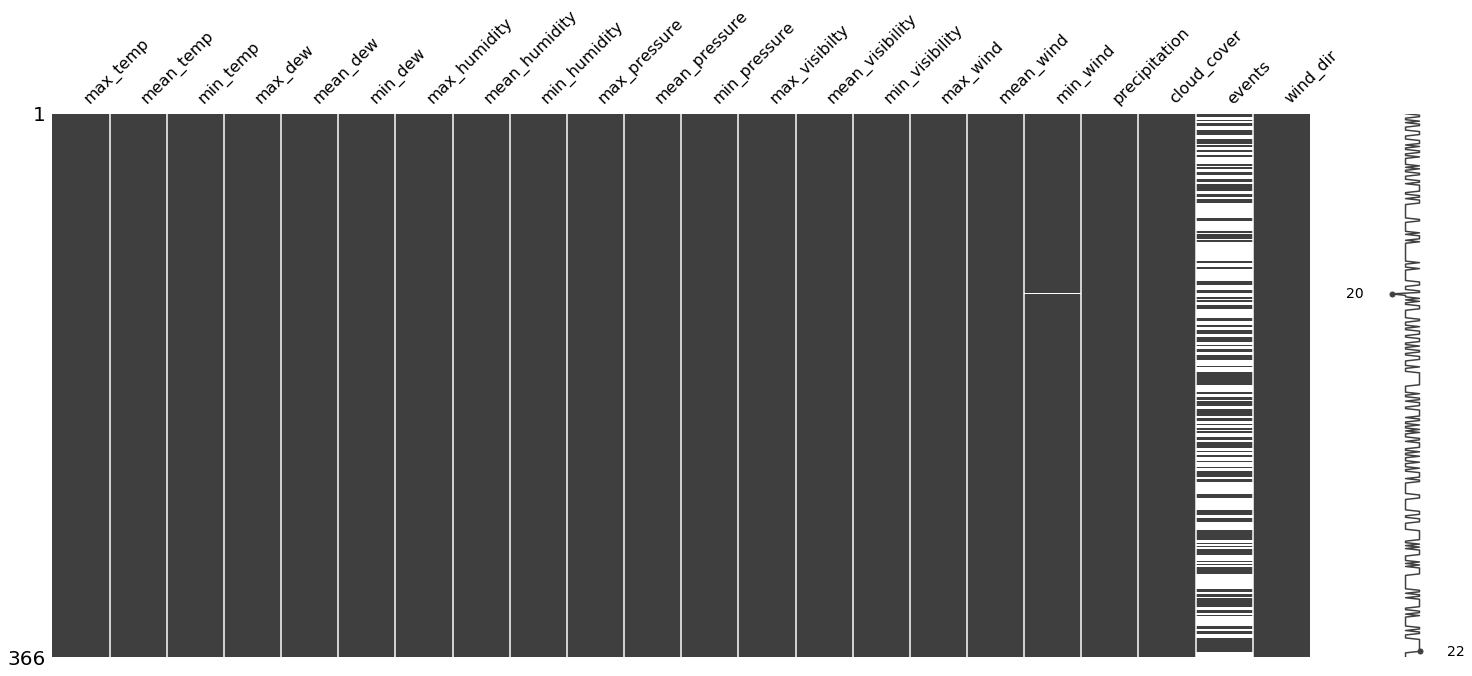

In [177]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

In [30]:
data.events = data.events.fillna("Unknown")
data.events.head(10)

date
2012-03-10              Unknown
2012-03-11                 Rain
2012-03-12                 Rain
2012-03-13              Unknown
2012-03-14              Unknown
2012-03-15    Rain-Thunderstorm
2012-03-16              Unknown
2012-03-17     Fog-Thunderstorm
2012-03-18                 Rain
2012-03-19              Unknown
Name: events, dtype: object

In [31]:
data.events.value_counts()

Unknown                       204
Rain                           69
Rain-Thunderstorm              26
Snow                           13
Fog                            13
Fog-Rain                       11
Thunderstorm                    9
Fog-Rain-Thunderstorm           8
Fog-Snow                        5
Rain-Snow                       3
Fog-Rain-Snow                   3
Fog-Thunderstorm                1
Fog-Rain-Snow-Thunderstorm      1
Name: events, dtype: int64

### Filtering Rows

In [184]:
data1 = data[data.max_temp <= 32]
print (data1.shape)
data2 = data[(data.max_temp <= 32) & (data.min_temp >= 20)]
data2.shape

(21, 22)


(7, 22)

### Grouping And Aggregating

In [185]:
data.groupby(["events"])["max_temp"].mean()

,max_temp,min_temp
events,,
Fog,67.153846,40.846154
Fog-Rain,58.636364,42.727273
Fog-Rain-Snow,43.333333,24.000000
Fog-Rain-Snow-Thunderstorm,57.000000,28.000000
Fog-Rain-Thunderstorm,80.125000,58.750000
Fog-Snow,32.200000,21.800000
Fog-Thunderstorm,78.000000,46.000000
Rain,64.797101,46.188406
Rain-Snow,50.666667,27.333333


In [186]:
data.groupby(["events","cloud_cover"])["max_temp"].mean()

events                      cloud_cover
Fog                         0              61.000000
                            1              60.000000
                            2              86.000000
                            3              61.500000
                            4              80.666667
Fog-Rain                    1              64.000000
                            4              69.500000
                            5              65.000000
                            6              70.500000
                            7              40.000000
                            8              49.000000
Fog-Rain-Snow               5              33.000000
                            6              57.000000
                            8              40.000000
Fog-Rain-Snow-Thunderstorm  8              57.000000
Fog-Rain-Thunderstorm       3              86.666667
                            4              79.500000
                            6              74.500000
      

### Creating New Columns

In [187]:
data["avg_temp"] = (data.max_temp + data.min_temp)/2
data.head()

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir,avg_temp
date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,56,40,24,24,20,16,74,50,26,30.53,...,10,10,13,6,17.0,0.00,0,Unknown,138,40.0
2012-03-11,67,49,30,43,31,24,78,53,28,30.37,...,10,10,22,7,32.0,T,1,Rain,163,48.5
2012-03-12,71,62,53,59,55,43,90,76,61,30.13,...,10,6,24,14,36.0,0.03,6,Rain,190,62.0
2012-03-13,76,63,50,57,53,47,93,66,38,30.12,...,10,4,16,5,24.0,0.00,0,Unknown,242,63.0
2012-03-14,80,62,44,58,52,43,93,68,42,30.15,...,10,10,16,6,22.0,0.00,0,Unknown,202,62.0


### Find the count of number of rainy days

In [188]:
data.events.value_counts()

Unknown                       204
Rain                           69
Rain-Thunderstorm              26
Snow                           13
Fog                            13
Fog-Rain                       11
Thunderstorm                    9
Fog-Rain-Thunderstorm           8
Fog-Snow                        5
Rain-Snow                       3
Fog-Rain-Snow                   3
Fog-Rain-Snow-Thunderstorm      1
Fog-Thunderstorm                1
Name: events, dtype: int64

In [189]:
data["rain"] = data.events.apply(lambda a: "Rain" in a)
data.head()
data.rain.value_counts()

False    245
True     121
Name: rain, dtype: int64

### Quick Plots In Pandas

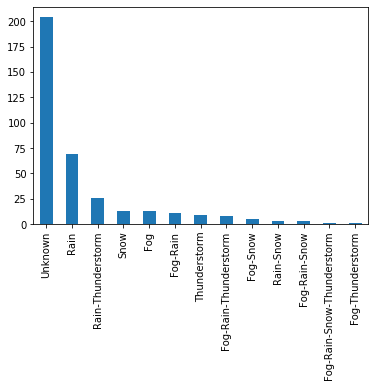

In [191]:
eventsSummary = data.events.value_counts()
eventsSummary.plot(kind="bar")

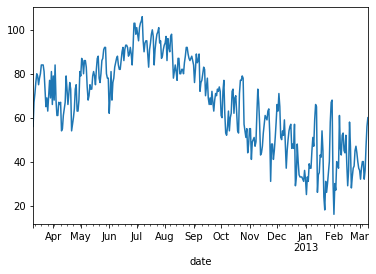

In [192]:
data.max_temp.plot()

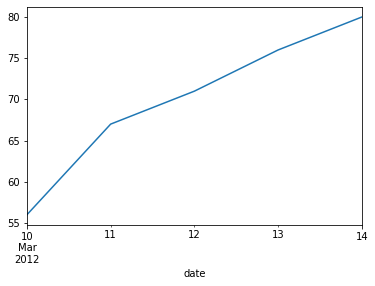

In [198]:
data.max_temp.head().plot()

### With More Plotting Option

Text(0, 0.5, 'Temperature (F)')

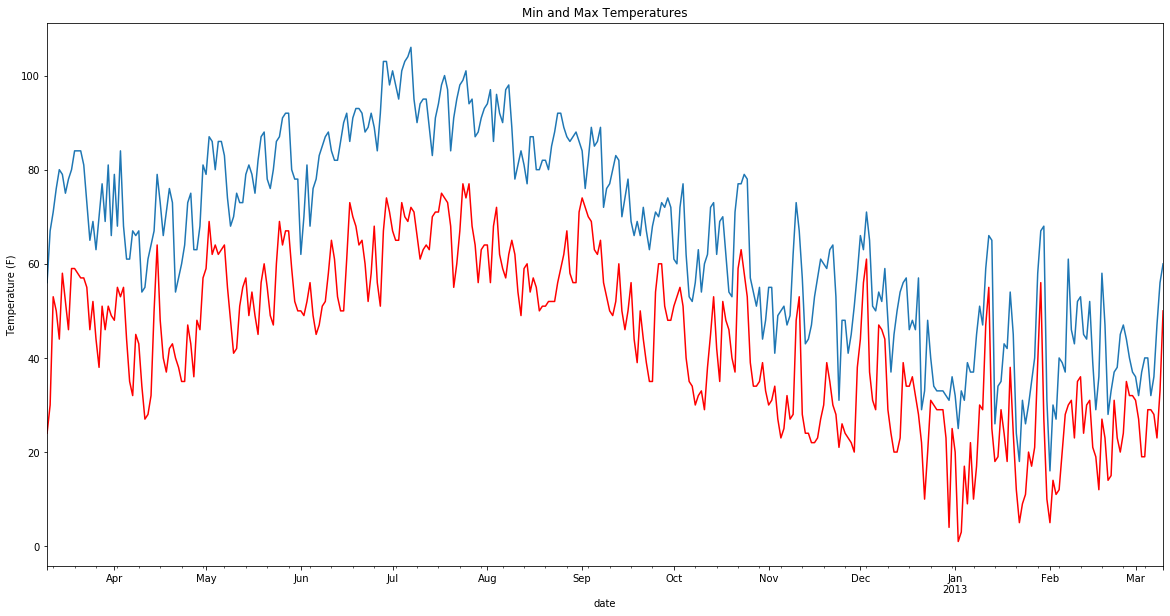

In [194]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
fig.set_size_inches(20, 10)
data.max_temp.plot(title="Min and Max Temperatures")
data.min_temp.plot(style="red")
ax.set_ylabel("Temperature (F)")

### Writing Out To File

In [197]:
data.to_csv("..\data\\weather_modified.csv")

### Done & Dusted